# Sarita - DSWDEOB 26082022

# Dimesnion Reduction

## Data Collection

Data: 
   The dataset contains details of heart patients.

Data Dictionary:
- Dataset contains 303 Heart Pateint details
- 14 features are recorded for Heart Patient

Description:
- age :      age of patient 
- sex :      sex of patient 
- cp  :      chest pain type (4 values)
- trestbps : resting blood pressure
- chol   :   serum cholestoral in mg/dl
- fbs    :   fasting blood sugar > 120 mg/dl
- restecg :  resting electrocardiographic results (values 0,1,2)
- thalach :  maximum heart rate achieved
- exang   :  exercise induced angina
- oldpeak :  ST depression induced by exercise relative to rest
- slope   :  the slope of the peak exercise ST segment
- ca     :   number of major vessels (0-3) colored by flourosopy
- thal:  :   0 = normal; 1 = fixed defect; 2 = reversable defect
- target :   The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

#### Install the required packages if not available

In [1]:
#!pip install feature_engine
# !pip install dtale

**Importing required packages**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import TruncatedSVD
from kneed import KneeLocator

### Suppress the Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

**Import the data**

In [4]:
df = pd.read_csv(r"C:\Users\Ajay Nandal\Downloads\Datasets_PCA_Problem Statement\heart disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***Descriptive Statistics and Data Distribution Function***

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Preprocessing

In [7]:
# Drop the unwanted features
#df1 = df.drop(["UnivID"], axis = 1)

In [8]:
df1 = df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Checking Null Values

In [9]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### SVD can be implemented only on Numeric features

In [10]:
numeric_features = df1.select_dtypes(exclude = ['object']).columns

In [11]:
numeric_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Define the Pipeline steps

#### Define SVD model

In [17]:
svd = TruncatedSVD(n_components = 6)

## Make Pipeline

**By using mean imputation, null values can be imputed**

**Data has to be standardized to address the scale difference**

In [18]:
num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler(), svd)

In [19]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df1[numeric_features]) 

In [21]:
processed

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('truncatedsvd', TruncatedSVD(n_components=6))])

In [22]:
# Apply the pipeline on the dataset
HD = pd.DataFrame(processed.transform(df1[numeric_features]))

HD

,0,1,2,3,4,5
0,-0.051739,2.624022,0.990054,3.479328,0.362773,1.695836
1,-0.817441,-0.730375,-0.235928,2.767545,2.258404,-0.808414
2,-2.057599,-0.039098,-0.519839,0.081198,0.860416,0.752783
3,-1.903043,-0.596701,0.076204,-0.082624,-0.235141,-0.500292
4,-0.768371,0.412545,-2.187455,-1.988510,0.017448,-0.074219
...,...,...,...,...,...,...
298,1.485287,-0.423483,-1.683247,-0.490555,-0.187162,-0.525461
299,-0.140325,-1.215922,0.138325,0.977923,0.884803,-1.240199
300,2.681772,0.593019,1.791015,1.300262,-1.331351,-1.201660
301,2.170858,-2.166992,-0.081516,0.890244,-1.177444,-0.346770


## Save the End to End SVD pipeline with Imputation and Standardization

In [23]:
import joblib

joblib.dump(processed, 'Data_prep_DimRed')

['Data_prep_DimRed']

In [24]:
import os 
os.getcwd()

'C:\\Users\\Ajay Nandal'

## Import the pipeline

In [25]:
model = joblib.load("Data_prep_DimRed")

In [26]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('truncatedsvd', TruncatedSVD(n_components=6))])

## Apply the saved model on to the Dataset to extract SVD values

In [29]:
svd_res = pd.DataFrame(model.transform(df1[numeric_features]))

svd_res

,0,1,2,3,4,5
0,-0.051739,2.624022,0.990054,3.479328,0.362773,1.695836
1,-0.817441,-0.730375,-0.235928,2.767545,2.258404,-0.808414
2,-2.057599,-0.039098,-0.519839,0.081198,0.860416,0.752783
3,-1.903043,-0.596701,0.076204,-0.082624,-0.235141,-0.500292
4,-0.768371,0.412545,-2.187455,-1.988510,0.017448,-0.074219
...,...,...,...,...,...,...
298,1.485287,-0.423483,-1.683247,-0.490555,-0.187162,-0.525461
299,-0.140325,-1.215922,0.138325,0.977923,0.884803,-1.240199
300,2.681772,0.593019,1.791015,1.300262,-1.331351,-1.201660
301,2.170858,-2.166992,-0.081516,0.890244,-1.177444,-0.346770


# SVD for Feature Extraction

In [33]:
# Final dataset with manageable number of columns (Feature Extraction)

final = pd.concat([df.age, svd_res.iloc[:, 0:3]], axis = 1)
final.columns = ['age', 'svd0', 'svd1', 'svd2']
final

,age,svd0,svd1,svd2
0,63,-0.051739,2.624022,0.990054
1,37,-0.817441,-0.730375,-0.235928
2,41,-2.057599,-0.039098,-0.519839
3,56,-1.903043,-0.596701,0.076204
4,57,-0.768371,0.412545,-2.187455
...,...,...,...,...
298,57,1.485287,-0.423483,-1.683247
299,45,-0.140325,-1.215922,0.138325
300,68,2.681772,0.593019,1.791015
301,57,2.170858,-2.166992,-0.081516


0      Text(-0.05173910760826528, 2.6240220403508094,...
1      Text(-0.8174405938124418, -0.7303745764645042,...
2      Text(-2.0575993225549123, -0.03909844631125674...
3      Text(-1.9030431846461953, -0.596700877245276, ...
4      Text(-0.7683706199246916, 0.4125454959715758, ...
                             ...                        
298    Text(1.485287158760746, -0.42348317449362843, ...
299    Text(-0.14032537905307238, -1.2159220521656144...
300    Text(2.6817720617178624, 0.5930189445601521, '...
301    Text(2.1708579312401275, -2.166992045059814, '...
302    Text(-0.3657596568455729, 0.7879160765700154, ...
Length: 303, dtype: object

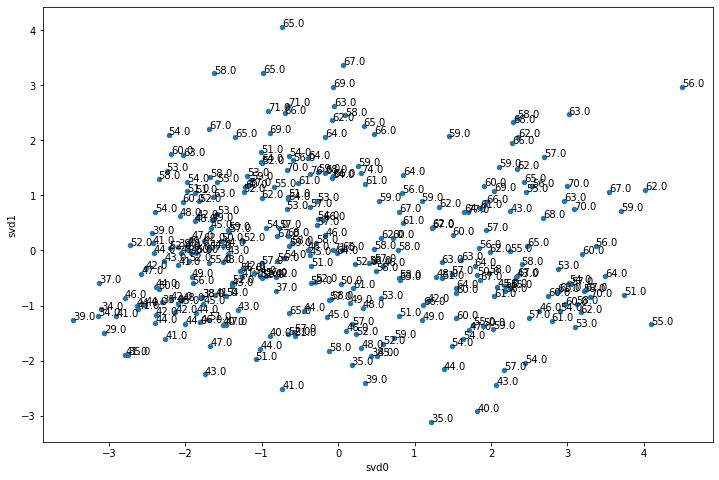

In [34]:
# Scatter diagram
ax = final.plot(x = 'svd0', y = 'svd1', kind = 'scatter', figsize = (12, 8))
final[['svd0', 'svd1', 'age']].apply(lambda x: ax.text(*x), axis = 1)

# Prediction on new data

In [35]:
#newdf = pd.read_excel(r"C:\Users\asus\DataScience\codes_DS_sample\clustering_University_csv\new_Univ_4_pred.xlsx")

#newdf